In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools


In [ ]:
with open('NER/extracted_data.json', 'r') as json_data:
    d = json.load(json_data)  # Use json.load() instead of json.loads()

print(d)

{'PORT_SPEED': [['500 mbps', 'PORT_SPEED'], ['1 gbps', 'PORT_SPEED']], 'STATES_CITIES': ['va', 'india', 'ny'], 'TERM': [['1 year', 'DATE'], ['2 years', 'DATE']], 'CIR_TYPES': ['dia']}


In [3]:
for key in d.keys():
    print(key)

for value in d.values():
    print(value)

PORT_SPEED
STATES_CITIES
TERM
CIR_TYPES
[['500 mbps', 'PORT_SPEED'], ['1 gbps', 'PORT_SPEED']]
['va', 'india', 'ny']
[['1 year', 'DATE'], ['2 years', 'DATE']]
['dia']


In [4]:
keys = list(d.keys())
values = [d[key] for key in keys]

combinations = list(itertools.product(*values))

df = pd.DataFrame(combinations, columns=keys)

In [5]:
df

,PORT_SPEED,STATES_CITIES,TERM,CIR_TYPES
0,"[500 mbps, PORT_SPEED]",va,"[1 year, DATE]",dia
1,"[500 mbps, PORT_SPEED]",va,"[2 years, DATE]",dia
2,"[500 mbps, PORT_SPEED]",india,"[1 year, DATE]",dia
3,"[500 mbps, PORT_SPEED]",india,"[2 years, DATE]",dia
4,"[500 mbps, PORT_SPEED]",ny,"[1 year, DATE]",dia
5,"[500 mbps, PORT_SPEED]",ny,"[2 years, DATE]",dia
6,"[1 gbps, PORT_SPEED]",va,"[1 year, DATE]",dia
7,"[1 gbps, PORT_SPEED]",va,"[2 years, DATE]",dia
8,"[1 gbps, PORT_SPEED]",india,"[1 year, DATE]",dia
9,"[1 gbps, PORT_SPEED]",india,"[2 years, DATE]",dia


In [6]:
def clean_term(term):
    term = str(term).strip().lower()

    if 'mtm' in term:
        return '12'
    elif 'co-term' in term or 'coterminous' in term:
        return '12'
    elif 'yr' in term or 'year' in term:
        parts = term.split()
        return str(int(parts[0]) * 12) if parts[0].isdigit() else '12'
    elif 'mo' in term or 'month' in term:
        return ''.join(filter(str.isdigit, term))
    elif term.isdigit():
        return term
    elif ',' in term:
        return term.split(',')[0].strip()

    return '12'



df['TERM'] = df['TERM'].apply(clean_term)

# print(df['Term_Cleaned'].unique())

In [7]:
df

,PORT_SPEED,STATES_CITIES,TERM,CIR_TYPES
0,"[500 mbps, PORT_SPEED]",va,12,dia
1,"[500 mbps, PORT_SPEED]",va,12,dia
2,"[500 mbps, PORT_SPEED]",india,12,dia
3,"[500 mbps, PORT_SPEED]",india,12,dia
4,"[500 mbps, PORT_SPEED]",ny,12,dia
5,"[500 mbps, PORT_SPEED]",ny,12,dia
6,"[1 gbps, PORT_SPEED]",va,12,dia
7,"[1 gbps, PORT_SPEED]",va,12,dia
8,"[1 gbps, PORT_SPEED]",india,12,dia
9,"[1 gbps, PORT_SPEED]",india,12,dia


In [8]:
import pandas as pd
import re

def clean_port_speed(value):
    if isinstance(value, list):  # If value is a list, extract the first element
        value = value[0]  
    
    if pd.isna(value):
        return None

    value = str(value).strip().lower()  # Ensure it's a string

    numbers = [float(n) for n in re.findall(r"[\d\.]+", value)]

    if not numbers:
        return None

    max_value = max(numbers)

    if "g" in value:
        max_value *= 1000  # Convert Gbps to Mbps

    return int(max_value)

df['PORT_SPEED'] = df['PORT_SPEED'].apply(clean_port_speed)


In [9]:
df

,PORT_SPEED,STATES_CITIES,TERM,CIR_TYPES
0,500,va,12,dia
1,500,va,12,dia
2,500,india,12,dia
3,500,india,12,dia
4,500,ny,12,dia
5,500,ny,12,dia
6,1000,va,12,dia
7,1000,va,12,dia
8,1000,india,12,dia
9,1000,india,12,dia


In [10]:
column_mapping = {
    'STATES_CITIES': 'A Loc State',
    'CIR_TYPES': 'generalized_Cir'
}

# Rename columns in test_data
df.rename(columns=column_mapping, inplace=True)

# Verify the updated column names
print(df.columns)


Index(['PORT_SPEED', 'A Loc State', 'TERM', 'generalized_Cir'], dtype='object')


In [11]:
df

,PORT_SPEED,A Loc State,TERM,generalized_Cir
0,500,va,12,dia
1,500,va,12,dia
2,500,india,12,dia
3,500,india,12,dia
4,500,ny,12,dia
5,500,ny,12,dia
6,1000,va,12,dia
7,1000,va,12,dia
8,1000,india,12,dia
9,1000,india,12,dia


In [12]:
import pickle

with open("model_and_encoders/label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

print(label_encoders.keys())


dict_keys(['A Loc State', 'generalized_Cir'])


In [13]:
# Ensure test_data exists
for col in ['A Loc State', 'generalized_Cir']:
    if col in df.columns:
        df[col + '_Freq'] = df[col].map(
            lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1
        )


In [14]:
df

,PORT_SPEED,A Loc State,TERM,generalized_Cir,A Loc State_Freq,generalized_Cir_Freq
0,500,va,12,dia,67,2
1,500,va,12,dia,67,2
2,500,india,12,dia,21,2
3,500,india,12,dia,21,2
4,500,ny,12,dia,43,2
5,500,ny,12,dia,43,2
6,1000,va,12,dia,67,2
7,1000,va,12,dia,67,2
8,1000,india,12,dia,21,2
9,1000,india,12,dia,21,2


In [15]:
df[(df['A Loc State_Freq'] == -1)]

,PORT_SPEED,A Loc State,TERM,generalized_Cir,A Loc State_Freq,generalized_Cir_Freq


In [16]:
# Extract indexes where 'A Loc State_Freq' is -1
removed_indexes = df[df['A Loc State_Freq'] == -1].index.tolist()

# Filter the DataFrame
new_test_data = df[df['A Loc State_Freq'] != -1]

# Print or use the list of removed indexes
print(removed_indexes)


[]


In [17]:
df.drop(columns=['A Loc State', 'generalized_Cir'], inplace=True)

In [18]:
df

,PORT_SPEED,TERM,A Loc State_Freq,generalized_Cir_Freq
0,500,12,67,2
1,500,12,67,2
2,500,12,21,2
3,500,12,21,2
4,500,12,43,2
5,500,12,43,2
6,1000,12,67,2
7,1000,12,67,2
8,1000,12,21,2
9,1000,12,21,2


In [19]:
Provider_encoded = [1419, 1392, 1676.5, 805, 1295]

In [20]:
for i in range(5):
    df[f'Provider_{i}'] = Provider_encoded[i]
df['TERM'] = pd.to_numeric(df['TERM'], errors='coerce').astype('Int64')


In [21]:
df

,PORT_SPEED,TERM,A Loc State_Freq,generalized_Cir_Freq,Provider_0,Provider_1,Provider_2,Provider_3,Provider_4
0,500,12,67,2,1419,1392,1676.5,805,1295
1,500,12,67,2,1419,1392,1676.5,805,1295
2,500,12,21,2,1419,1392,1676.5,805,1295
3,500,12,21,2,1419,1392,1676.5,805,1295
4,500,12,43,2,1419,1392,1676.5,805,1295
5,500,12,43,2,1419,1392,1676.5,805,1295
6,1000,12,67,2,1419,1392,1676.5,805,1295
7,1000,12,67,2,1419,1392,1676.5,805,1295
8,1000,12,21,2,1419,1392,1676.5,805,1295
9,1000,12,21,2,1419,1392,1676.5,805,1295


In [ ]:
import joblib
temp_data = pd.DataFrame()
best_xgb= joblib.load("./model_and_encoders/best_xgb_model.pkl")
print("Model loaded successfully.")

for i in range(5):
    features_inorder = [
    'PORT_SPEED', 'TERM', 'A Loc State_Freq', 
    f'Provider_{i}',
    'generalized_Cir_Freq']

    X_test = df[features_inorder]

    y_pred = best_xgb.predict(X_test)

    y_pred
    temp_data[f'prediction_provider_{i}'] = y_pred

Model loaded successfully.


In [23]:
temp_data

,prediction_provider_0,prediction_provider_1,prediction_provider_2,prediction_provider_3,prediction_provider_4
0,2273.732422,2499.521484,977.745483,879.221375,1912.583984
1,2273.732422,2499.521484,977.745483,879.221375,1912.583984
2,2908.771973,3846.179932,1321.765259,2222.699951,2719.970215
3,2908.771973,3846.179932,1321.765259,2222.699951,2719.970215
4,2257.165283,2689.250977,1115.330933,1204.607422,1774.026978
5,2257.165283,2689.250977,1115.330933,1204.607422,1774.026978
6,2166.370361,2198.825195,1668.245483,929.643555,1773.337646
7,2166.370361,2198.825195,1668.245483,929.643555,1773.337646
8,2908.277832,4591.841309,1736.079712,2347.336426,2640.722656
9,2908.277832,4591.841309,1736.079712,2347.336426,2640.722656


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


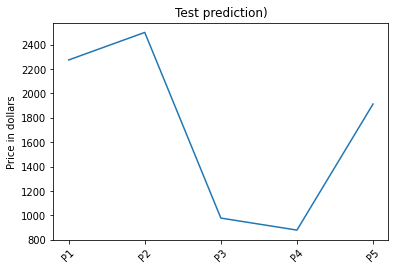

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


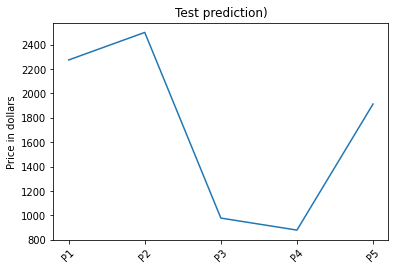

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


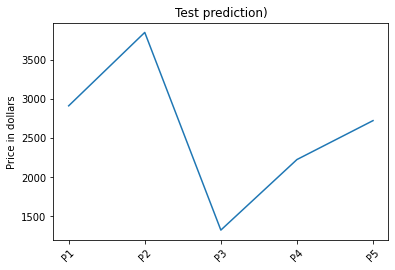

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


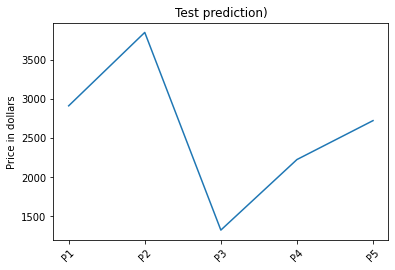

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


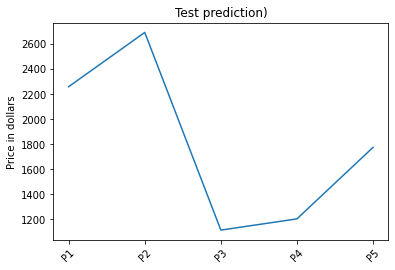

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


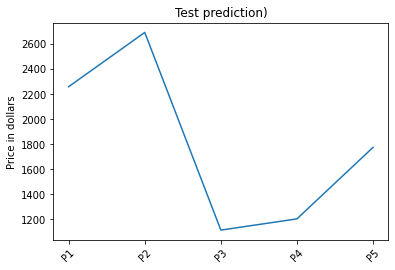

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


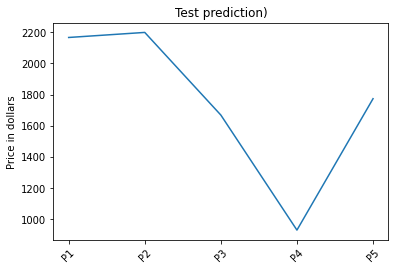

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


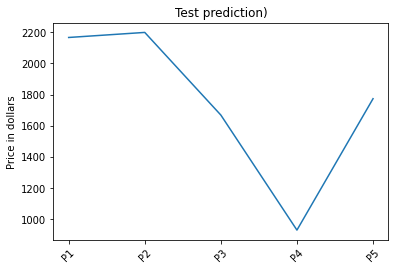

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


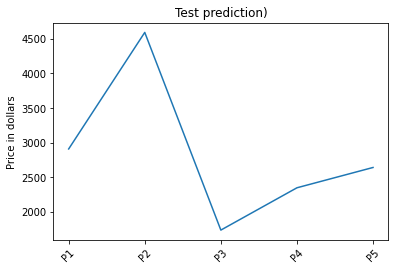

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


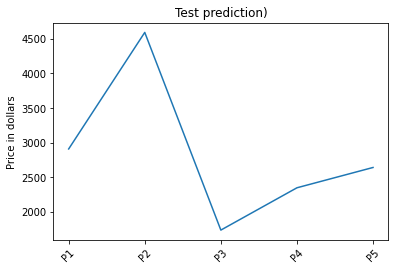

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


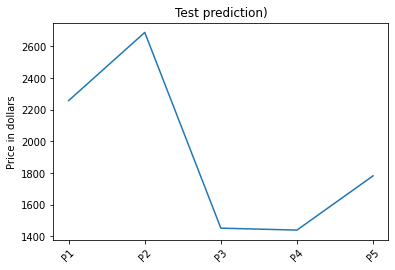

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_7433/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


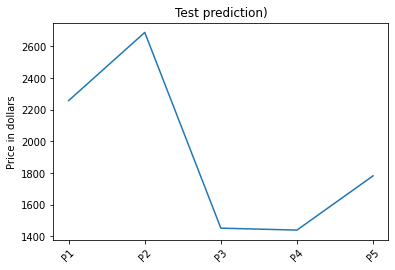

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

providers = ['P1', 'P2', 'P3', 'P4', 'P5']

for i in range(len(temp_data)):

    values = temp_data.iloc[i,:]

    sns.lineplot(x=providers, y=values, palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Test prediction)")
    plt.ylabel("Price in dollars")
    plt.show()

In [25]:
"""
Zayo	
Verizon	
Centurylink	
Colt	
AT&T	
"""

'\nZayo\t\nVerizon\t\nCenturylink\t\nColt\t\nAT&T\t\n'